In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the dataset
dataset = pd.read_csv("train_dataset.csv")
X_train = dataset.iloc[:, 0:28].values
y_train = dataset.iloc[:, 28:38].values

print("X: \n", X_train)
print("y: ", y_train)





X: 
 [[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]]
y:  [[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 

In [3]:
import pandas as pd
import numpy as np

# Load the test dataset
dataset_path = "test_dataset.csv"
dataset = pd.read_csv(dataset_path)

# Set the parameters for adding noise
noise_mean = 0  # Adjust the mean to control the amount of noise
noise_std_dev = 0.1  # Adjust the standard deviation to control the amount of noise

# Add Gaussian noise to the dataset
noisy_data = dataset.copy()
num_features = dataset.shape[1]

# Apply noise to each feature except the last ten columns (assuming these are output values)
for column in dataset.columns[:-10]:
    noise = np.random.normal(noise_mean, noise_std_dev, dataset[column].shape)
    noisy_data[column] = dataset[column] + noise
    # Ensure values are within [0, 1] range
    noisy_data[column] = noisy_data[column].clip(0, 1)

# Save the noisy dataset to a new CSV file
noisy_dataset_path = "test_dataset_with_noise.csv"
noisy_data.to_csv(noisy_dataset_path, index=False)

print(f"Noisy dataset saved to: {noisy_dataset_path}")


test_dataset = pd.read_csv("test_dataset_with_noise.csv")

# Separating input features and target labels for testing
X_test = test_dataset.iloc[:, 0:28].values
y_test = test_dataset.iloc[:, 28:38].values

Noisy dataset saved to: test_dataset_with_noise.csv


In [4]:
# Building the Neural Network


model = Sequential()



# Input layer and first hidden layer with 64 neurons and ReLU activation


model.add(Dense(64, input_dim=28, activation="relu"))


# Second hidden layer with 32 neurons and ReLU activation


model.add(Dense(32, activation="relu"))


# Output layer with 10 neurons (for each digit) and softmax activation


model.add(Dense(10, activation="softmax"))



# Compiling the model


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



# Training the model


model1 = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=70, batch_size=8)

Epoch 1/70
12/12 [==============================] - 1s 17ms/step - loss: 2.2805 - accuracy: 0.1630 - val_loss: 2.2877 - val_accuracy: 0.1500
Epoch 2/70
12/12 [==============================] - 0s 4ms/step - loss: 2.1581 - accuracy: 0.3152 - val_loss: 2.2009 - val_accuracy: 0.2375
Epoch 3/70
12/12 [==============================] - 0s 4ms/step - loss: 2.0583 - accuracy: 0.4239 - val_loss: 2.1210 - val_accuracy: 0.3375
Epoch 4/70
12/12 [==============================] - 0s 5ms/step - loss: 1.9567 - accuracy: 0.5652 - val_loss: 2.0473 - val_accuracy: 0.2750
Epoch 5/70
12/12 [==============================] - 0s 4ms/step - loss: 1.8470 - accuracy: 0.5978 - val_loss: 1.9663 - val_accuracy: 0.2875
Epoch 6/70
12/12 [==============================] - 0s 5ms/step - loss: 1.7421 - accuracy: 0.6196 - val_loss: 1.8810 - val_accuracy: 0.3500
Epoch 7/70
12/12 [==============================] - 0s 5ms/step - loss: 1.6280 - accuracy: 0.6304 - val_loss: 1.7778 - val_accuracy: 0.3625
Epoch 8/70
12/12 [=

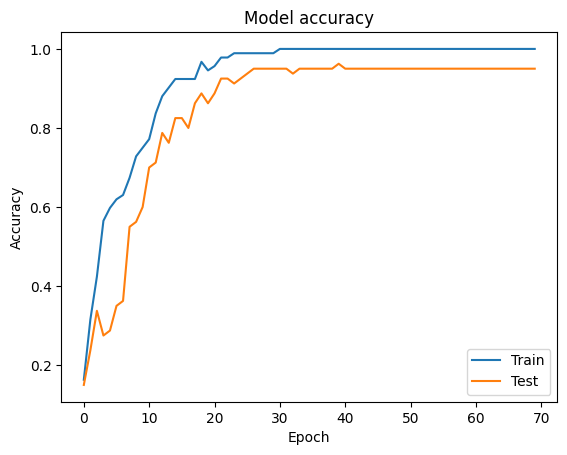

In [5]:
import matplotlib.pyplot as plt

plt.plot(model1.history["accuracy"])
plt.plot(model1.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="lower right")
plt.show()

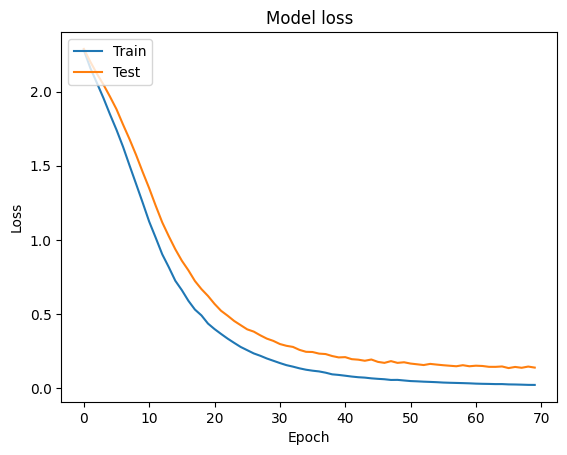

In [6]:
plt.plot(model1.history["loss"])
plt.plot(model1.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

3/3 [==============================] - 0s 1ms/step


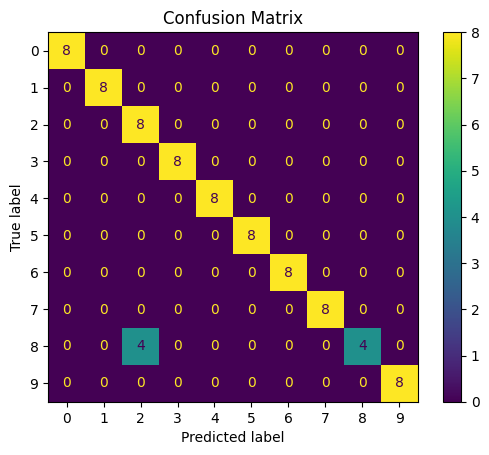

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicting on test data
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(X_test), axis=1)

# Creating confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

In [8]:
# Evaluating the model performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# Manually entering input for prediction
manual_input = np.array(
    [
        [
            0,
            1,
            1,
            0,
            1,
            0,
            0,
            1,
            0,
            0,
            0,
            1,
            0,
            0,
            1,
            0,
            1,
            1,
            0,
            0,
            1,
            0,
            0,
            0,
            1,
            1,
            1,
            1,
        ]
    ]
)
# manual_input_scaled = scaler.transform(manual_input)

# Predicting the class for the manual input
# prediction = model.predict(manual_input_scaled)
prediction=model.predict(manual_input)
print(f"Prediction for the manual input: {prediction}")
predicted_class_index = np.argmax(prediction, axis=1)
predicted_class = (predicted_class_index[0] + 1) % 10
print(f"Predicted class for the manual input: {predicted_class}")

# Saving the model for future use


model.save("digit_recognition_model.h5")

3/3 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9500
Test Accuracy: 95.00%
1/1 [==============================] - 0s 48ms/step
Prediction for the manual input: [[3.2542739e-05 9.8467863e-01 2.1914323e-03 2.5351042e-06 7.5598528e-08
  6.6912457e-05 1.3646862e-03 6.2190290e-03 1.9747217e-04 5.2467729e-03]]
Predicted class for the manual input: 2


In [9]:
import tkinter as tk

# Initialize the main window
root = tk.Tk()
root.title("4x7 Grid - Click to Toggle Cells")

# Set a larger window size
root.geometry("400x650")  # Adjust the width to better fit the layout

# Constants
ROWS = 7
COLS = 4

# Store the cell states (0 for white, 1 for black)
grid_data = [[0 for _ in range(COLS)] for _ in range(ROWS)]


# Function to toggle cell color and update grid data
def toggle_cell(row, col):
    # Toggle the cell state between 0 and 1
    grid_data[row][col] = 1 - grid_data[row][col]

    # Update the cell color
    color = "black" if grid_data[row][col] == 1 else "white"
    cells[row][col].configure(bg=color)


# Function to convert the grid to a vector and display it
def convert_to_vector():
    # Generate the initial vector from the grid
    vector = [grid_data[row][col] for row in range(ROWS) for col in range(COLS)]

    # Get the integer input for appending the 10-length vector
    try:
        num = int(input_entry.get())
        if 0 <= num <= 9:
            # Generate a vector of length 10 based on the input
            if num == 0:
                additional_vector = [0] * 9 + [1]  # 1 at the end for 0 input
            else:
                additional_vector = [1 if i == num - 1 else 0 for i in range(10)]
            # Append this vector to the original grid vector
            vector.extend(additional_vector)
        else:
            raise ValueError  # Trigger the exception for invalid range
    except ValueError:
        # Clear the Entry widget and show an error message if the input is invalid
        input_entry.delete(0, tk.END)
        input_entry.insert(0, "Enter a number 0-9")
        return

    # Convert the vector to a string format for display
    vector_str = ",".join(map(str, vector))

    # Clear the Entry widget and insert the new vector string
    vector_entry.delete(0, tk.END)
    vector_entry.insert(0, vector_str)


# Create cells (buttons) and add them to the grid
cells = []
for row in range(ROWS):
    row_cells = []
    for col in range(COLS):
        cell = tk.Button(
            root,
            width=8,  # Reduced width for closer columns
            height=4,  # Reduced height for a smaller size
            bg="white",
            command=lambda r=row, c=col: toggle_cell(r, c),
        )
        cell.grid(row=row, column=col, padx=0, pady=0)  # No padding between cells
        row_cells.append(cell)
    cells.append(row_cells)

# Input field for the integer (0-9)
input_label = tk.Label(root, text="Enter a number (0-9):")
input_label.grid(row=ROWS, column=0, columnspan=2)
input_entry = tk.Entry(root, width=5, justify="center")
input_entry.grid(row=ROWS, column=2, columnspan=2)

# Convert button
convert_button = tk.Button(root, text="Convert", command=convert_to_vector)
convert_button.grid(row=ROWS + 1, column=0, columnspan=COLS, pady=10)

# Entry to display and allow copying of the vector
vector_entry = tk.Entry(root, width=60, justify="center")  # Wider for better display
vector_entry.grid(row=ROWS + 2, column=0, columnspan=COLS, pady=10)

# Run the application
root.mainloop()

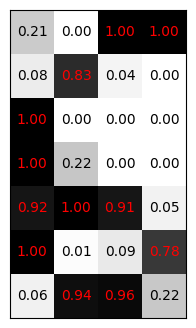

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Given data as a 1D list
data = [
    0.20504598707676558,
    0.0,
    1.0,
    1.0,
    0.07750882925615596,
    0.8297893048719587,
    0.04300570046983415,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.22297106350850587,
    0.0,
    0.0,
    0.917690605047834,
    0.9980747817095165,
    0.9134567074371805,
    0.05182279719449913,
    1.0,
    0.01340024274331881,
    0.08809240151606952,
    0.7798700895791246,
    0.058245163093620156,
    0.9436059471128614,
    0.9587947159448277,
    0.21841978152214223,
]

# Reshape data into a 4x7 array (4 columns, 7 rows)
grid_data = np.array(data).reshape(7, 4)

# Plotting the grid with inverted grayscale
plt.figure(figsize=(7, 4))  # Adjust figure size for 4x7 grid
plt.imshow(
    grid_data, cmap="gray_r", vmin=0, vmax=1
)  # Use inverted grayscale with 1=white and 0=black

# Remove axis ticks
plt.xticks([])
plt.yticks([])

# Optionally, add cell values as text annotations for clarity
for i in range(7):
    for j in range(4):
        plt.text(
            j,
            i,
            f"{grid_data[i, j]:.2f}",
            ha="center",
            va="center",
            color="black" if grid_data[i, j] < 0.5 else "red",
        )

plt.show()